In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
figures = {}

In [8]:
histories_df = pd.read_csv(os.path.join("..","mnist-results","histories_df.csv"))
evaluation_df = pd.read_csv(os.path.join("..","mnist-results","evaluation.csv"))
durations_df = pd.read_csv(os.path.join("..","mnist-results","durations.csv"))

In [23]:
durations_df.columns = ["model","duration"]

In [24]:
durations_df

,model,duration
0,Batch Gradient Descent,15.033991
1,Mini Batch Gradient Descent,69.924013
2,Stochastic Gradient Descent,3918.229174
3,Mini Batch GD With Learning rate decay,70.980195
4,Mini Batch GD With Learning rate decay and mom...,73.890594
5,Adam,75.754597
6,RMSProp,73.812522


/tmp/ipykernel_24475/3317316380.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


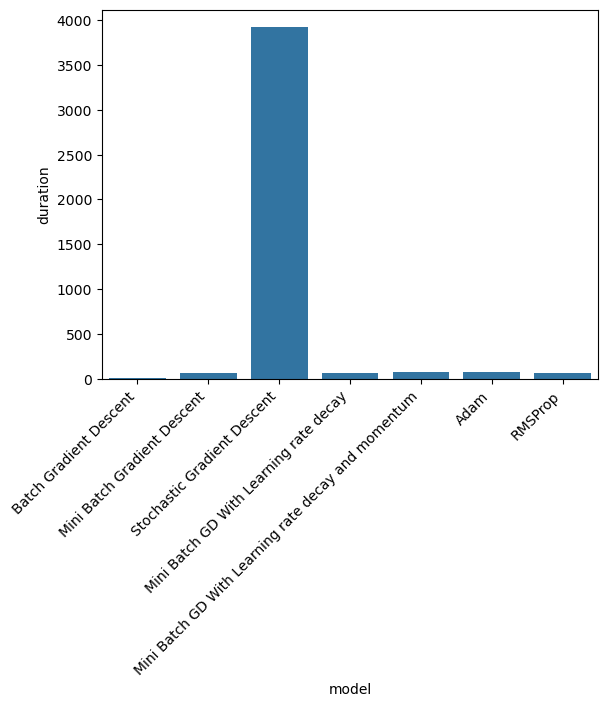

In [25]:
ax = sns.barplot(x=durations_df["model"],y=durations_df["duration"])
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

In [27]:
evaluation_df.index = durations_df["model"]

In [28]:
evaluation_df

,loss,accuracy
model,,
Batch Gradient Descent,2.076424,0.357833
Mini Batch Gradient Descent,0.106913,0.968750
Stochastic Gradient Descent,0.208053,0.975083
Mini Batch GD With Learning rate decay,0.113862,0.964750
Mini Batch GD With Learning rate decay and momentum,0.111840,0.977083
Adam,0.171247,0.976583
RMSProp,0.177938,0.979083


/tmp/ipykernel_24475/461668839.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


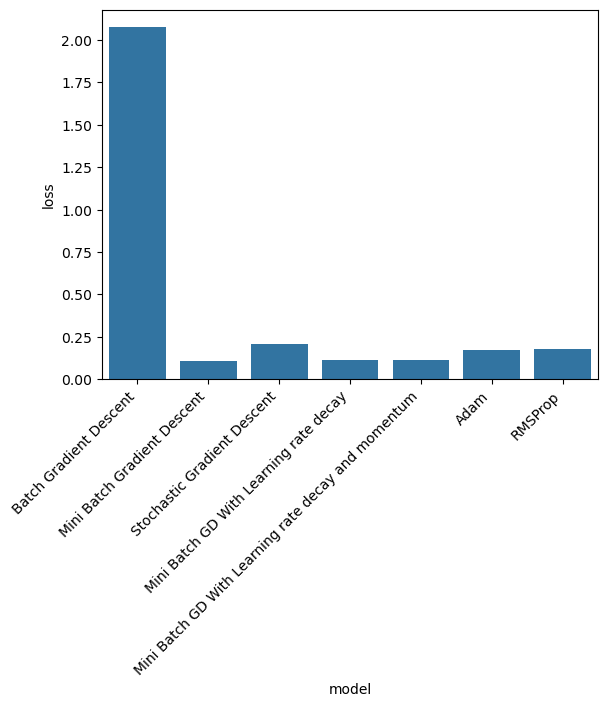

In [29]:
ax = sns.barplot(x=evaluation_df.index,y=evaluation_df["loss"])
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

/tmp/ipykernel_24475/755417911.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


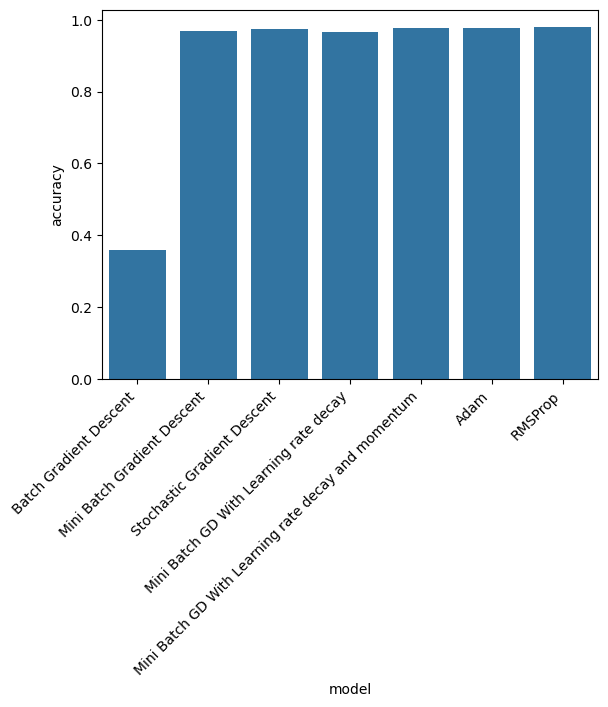

In [30]:
ax = sns.barplot(x=evaluation_df.index,y=evaluation_df["accuracy"])
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

In [32]:
histories_df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,model
0,2.326074,0.085958,2.319728,0.083500,Batch Gradient Descent
1,2.319953,0.088354,2.313713,0.085917,Batch Gradient Descent
2,2.313951,0.090708,2.307804,0.088417,Batch Gradient Descent
3,2.308059,0.093167,2.302004,0.091333,Batch Gradient Descent
4,2.302271,0.097062,2.296289,0.094417,Batch Gradient Descent


In [42]:
def plot_learning_graph_in_same_axis(
    histories_df,
    metric,
    split
):
    models = histories_df["model"].value_counts().index

    ax = None

    for model in models:
        
        mask = histories_df["model"] == model
        metric_name = metric if split == "train" else "val_"+metric
        y = histories_df[metric_name][mask]
        x = list(range(y.shape[0]))
        
        ax = sns.lineplot(x=x,y=y,ax=ax,label=model)

    plt.legend()

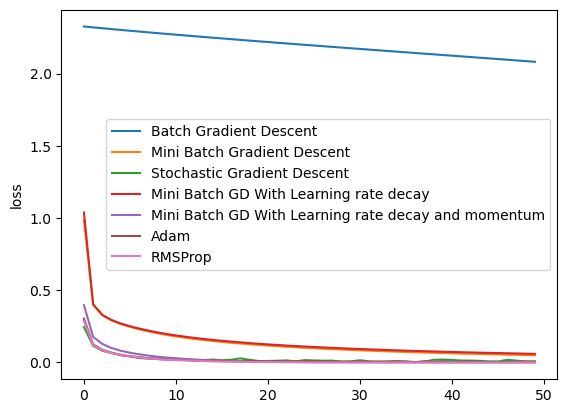

In [43]:
plot_learning_graph_in_same_axis(histories_df, "loss", "train")

(0.0, 50.0, 0.0, 1.2)

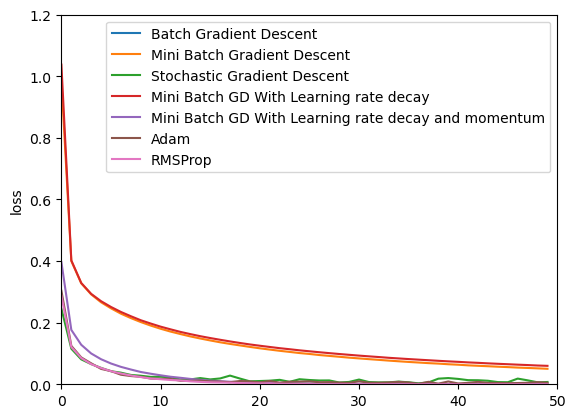

In [44]:
plot_learning_graph_in_same_axis(histories_df, "loss", "train")
plt.axis((0,50,0,1.2))

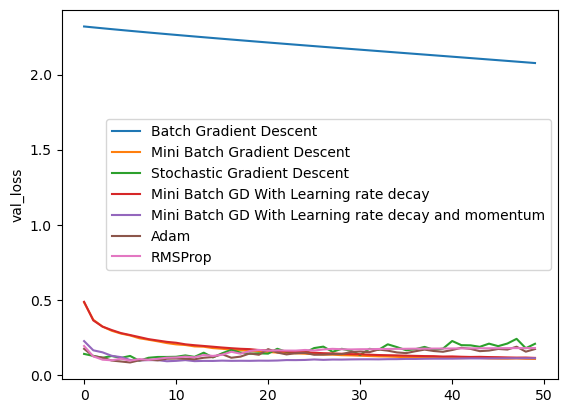

In [45]:
plot_learning_graph_in_same_axis(histories_df, "loss", "val")

(0.0, 50.0, 0.0, 0.5)

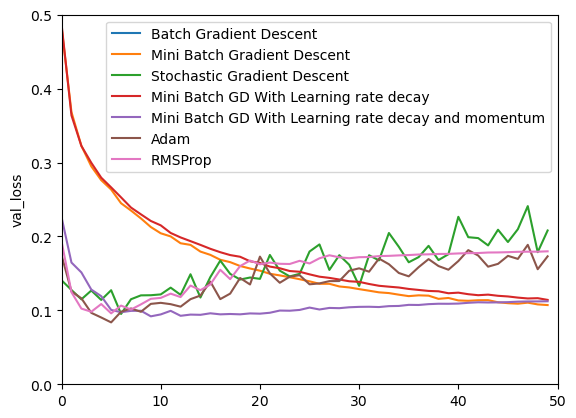

In [46]:
plot_learning_graph_in_same_axis(histories_df, "loss", "val")
plt.axis((0,50,0,0.5))

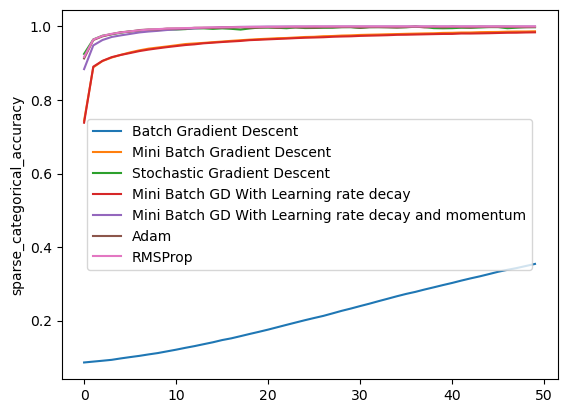

In [48]:
plot_learning_graph_in_same_axis(histories_df, "sparse_categorical_accuracy", "train")

(0.0, 50.0, 0.75, 1.0)

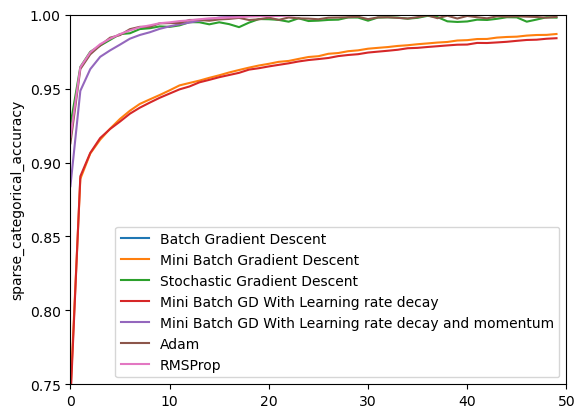

In [50]:
plot_learning_graph_in_same_axis(histories_df, "sparse_categorical_accuracy", "train")
plt.axis((0,50,0.75,1))

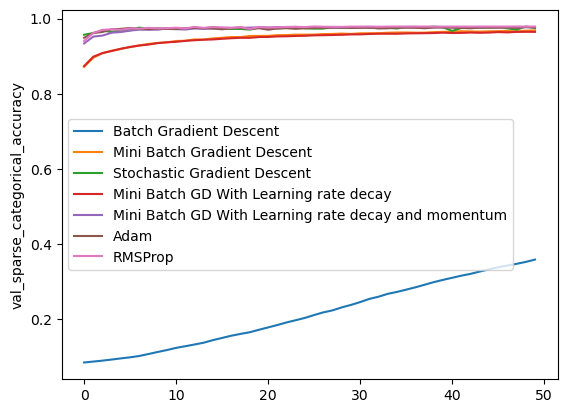

In [51]:
plot_learning_graph_in_same_axis(histories_df, "sparse_categorical_accuracy", "val")

(0.0, 50.0, 0.85, 1.0)

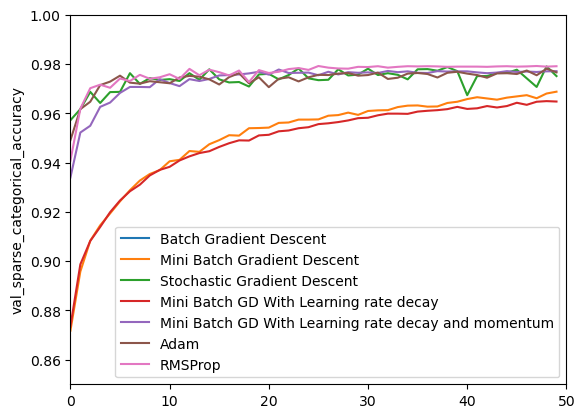

In [53]:
plot_learning_graph_in_same_axis(histories_df, "sparse_categorical_accuracy", "val")
plt.axis((0,50,0.85,1))

In [60]:
def plot_overfitting_graphs(histories_df):

    models = histories_df["model"].value_counts().index

    for model in models:
        
        fig,(ax1, ax2) = plt.subplots(nrows=2)

        df = histories_df[histories_df["model"] == model]

        x = list(range(len(df)))

        sns.lineplot(x=x,y=df["loss"],ax=ax1)
        sns.lineplot(x=x,y=df["val_loss"],ax=ax1)

        ax1.set_title(f"Loss graph Train Vs Validation set for model : {model}")

        sns.lineplot(x=x,y=df["sparse_categorical_accuracy"],ax=ax2)
        sns.lineplot(x=x,y=df["val_sparse_categorical_accuracy"],ax=ax2)

        ax2.set_title(f"accuracy graph Train Vs Validation set for model : {model}")

        plt.tight_layout()
        plt.show()

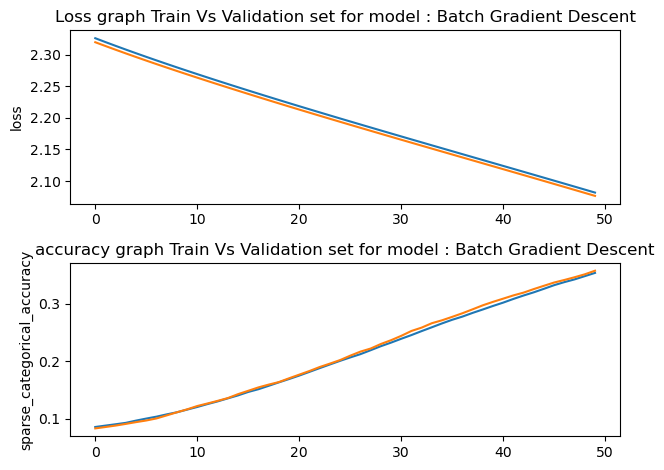

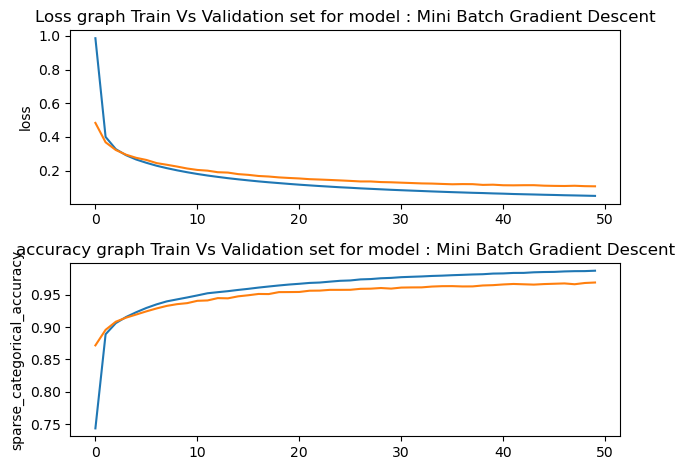

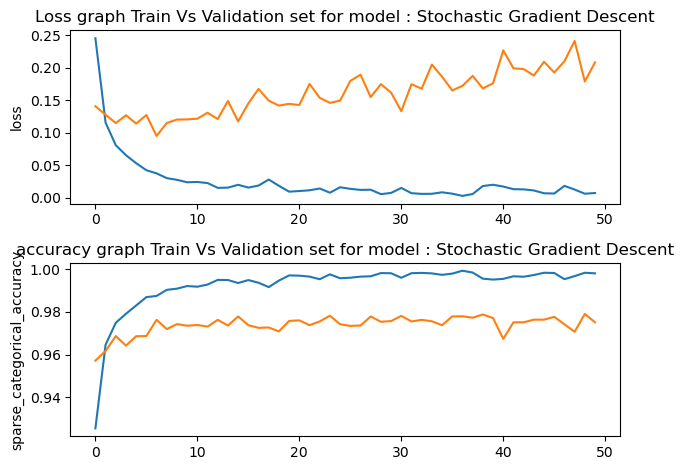

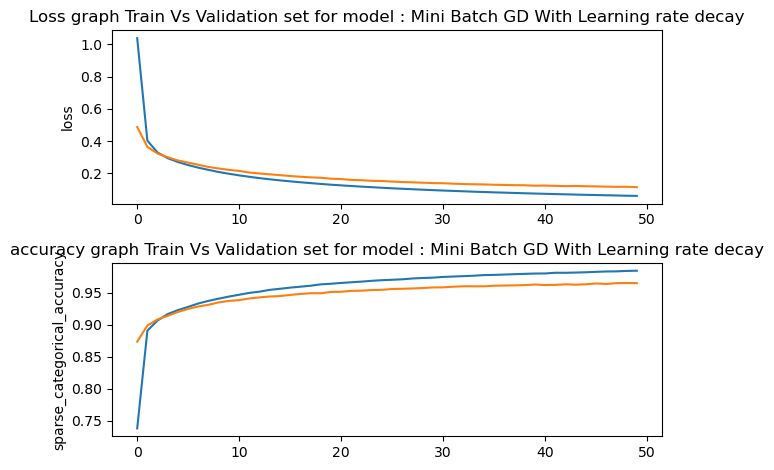

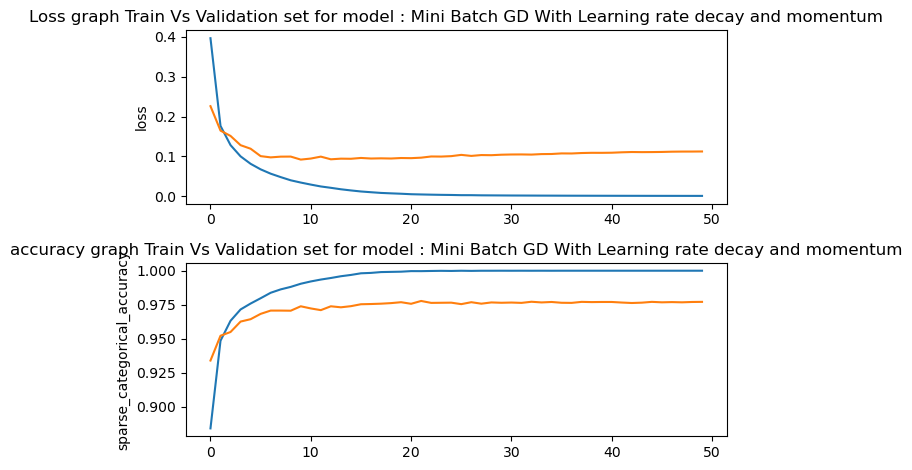

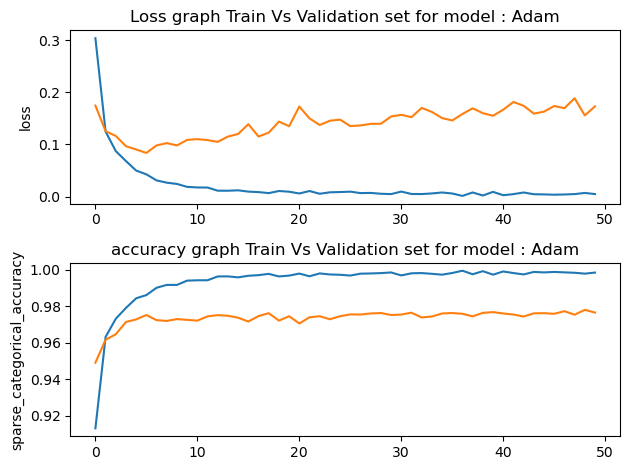

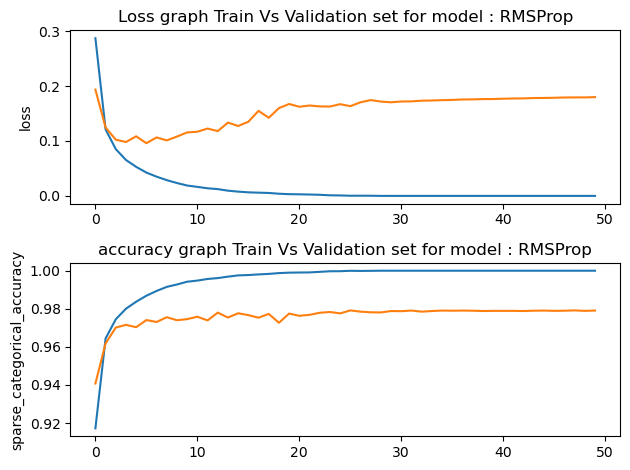

In [61]:
plot_overfitting_graphs(histories_df)